**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

Determine the order of operations below and carry out the appropriate cleaning.

1. Apply lemmatization / stemming
1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [39]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m pip install plotly
# Download spaCy's  'en' Model
!{sys.executable} -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [40]:
import re
import nltk
import operator
import pandas as pd
from itertools import islice
import csv
import numpy as np
import spacy


from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from urllib.request import urlopen
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Elisaveta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elisaveta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Elisaveta\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [43]:
text = pd.read_csv('C:/Users/Elisaveta/Documents/web_sites_data.csv')

In [5]:
len(text)

71699

#### Data processing

In [161]:
text_1 = text.iloc[:2,:]
text_1

,text
0,"<html>\n<head profile=""http://www.w3.org/2005/..."
1,"<html>\n<head profile=""http://www.w3.org/2005/..."


In [157]:
CLEANR = re.compile('<.*?>')                                                              #create regular expression for removing html tags
punct_mark = '''!()-[]{};:'"\,<>||./?@#'“”’‘—$%^&*_~+=|'''                                    #set of puntial marks   
stop_words = set(stopwords.words('english'))
load_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
words = set(nltk.corpus.words.words())

In [162]:
def remove_digits_words(data):
    text = re.sub(CLEANR, ' ', data['text'])                                                                  #remove html tags
    text = re.sub('\s+', ' ', text)                                                             #remove multiple space
    text = re.sub(r"http\S+", ' ', text)                                                        #remove URLs                                                           
    text = re.sub(r'[^\w\s]', ' ', text) 
    text = re.sub(r"[0-9]", ' ', text)                                             #remove digits and some exceptions
    text = text.lower()  # lower case conversion
    text = re.sub('size|weight|inches|publisher|url|title|nbsp|href|x|p', ' ', text)
    text = re.sub('\s+', ' ', text)                                                             #remove multiple space
    return text

In [165]:
cleaned_data = text.apply(remove_digits_words, axis=1,result_type='broadcast')
cleaned_data.head(1)

,text
0,eric newby love and war in the a ennines eric...


In [166]:
cleaned_data.iloc[0,0]

' eric newby love and war in the a ennines eric newby love and war in the a ennines author eric newby love and war in the a ennines moochable co ies no co ies available amazon suggests a short walk in the hindu kush slowly down the ganges on the shores of the mediterranean the last grain race round ireland in low gear recommended bookmooch bo of bookmooch bookmarks show more recommendations to ics abridged ancient asia audiobooks biogra hies memoirs biogra hies memoirs general books on cassette eastern front edition format euro e florence hiroshima nagasaki history history euro e general history euro e italy general home front intelligence o erations italy iwo jima medieval milan military na les naval normandy earl harbor ersonal narratives reference refinements renaissance rome sardinia sicily stalingrad travel travel euro e italy general tuscany umbria venice western front women world war ii writing ublished in english binding audio cassette ages date isbn har ercollins audio ounds e

In [169]:
def remove_stop_words(data):
    return " ".join([word for word in word_tokenize(data['text']) if word not in stop_words])

In [170]:
cleaned_data = cleaned_data.apply(remove_stop_words, axis=1,result_type='broadcast')
cleaned_data.iloc[0,0]

'eric newby love war ennines eric newby love war ennines author eric newby love war ennines moochable co ies co ies available amazon suggests short walk hindu kush slowly ganges shores mediterranean last grain race round ireland low gear recommended bookmooch bo bookmooch bookmarks show recommendations ics abridged ancient asia audiobooks biogra hies memoirs biogra hies memoirs general books cassette eastern front edition format euro e florence hiroshima nagasaki history history euro e general history euro e italy general home front intelligence erations italy iwo jima medieval milan military na les naval normandy earl harbor ersonal narratives reference refinements renaissance rome sardinia sicily stalingrad travel travel euro e italy general tuscany umbria venice western front women world war ii writing ublished english binding audio cassette ages date isbn har ercollins audio ounds edition abridged ed amazon rices revious givers jessierey usa oh revious moochers usa ca wishlists deb

In [172]:
def remove_non_english_words(data):
    return ' '.join(w for w in data['text'].split(' ') if w in words or not w.isalpha())

In [173]:
cleaned_data = cleaned_data.apply(remove_non_english_words, axis=1,result_type='broadcast')
cleaned_data.iloc[0,0]

'eric love war eric love war author eric love war available short walk slowly mediterranean last grain race round low gear bo show abridged ancient general eastern front edition format e florence history history e general history e general home front intelligence medieval military na naval earl harbor reference renaissance travel travel e general western front world war writing binding audio date audio ounds edition abridged oh ca deb book made summer allied eric among away cam cam behind went retreating enemy sheltered three classic memoir selfless unchanging funny bizarre dangerous ho es local girl later wife e story told related interest hood freedom h available b large book cover add save later web related recommend'

In [174]:
def lemmatization(data):
    str = load_model(data['text'])
    return " ".join([token.lemma_ for token in str])

In [175]:
cleaned_data = cleaned_data.apply(lemmatization, axis=1,result_type='broadcast')
cleaned_data.iloc[0,0]

'eric love war eric love war author eric love war available short walk slowly mediterranean last grain race round low gear bo show abridge ancient general eastern front edition format e florence history history e general history e general home front intelligence medieval military na naval earl harbor reference renaissance travel travel e general western front world war write bind audio date audio ound edition abridge oh can deb book make summer ally eric among away cam cam behind go retreat enemy shelter three classic memoir selfless unchanging funny bizarre dangerous ho es local girl later wife e story tell relate interest hood freedom h available b large book cover add save later web relate recommend'

In [222]:
def remove_characters(data):
    text = re.sub(r'_| [a-z] | bo |width|font|not|can|color|height|oh|ho|undefined', ' ', data['text'])                #remove multiple space
    return text

In [223]:
cleaned_data = cleaned_data.apply(remove_characters, axis=1,result_type='broadcast')
cleaned_data.iloc[0,0]

'eric love war eric love war aut r eric love war available s rt walk slowly mediterranean last grain race round low gear s w abridge ancient general eastern front edition format florence history history general history general  me front intelligence medieval military na naval earl harbor reference renaissance travel travel general western front world war write bind audio date audio ound edition abridge     deb book make summer ally eric among away cam cam behind go retreat enemy shelter three classic memoir selfless unchanging funny bizarre dangerous   es local girl later wife story tell relate interest  od freedom available large book cover add save later web relate recommend'

In [232]:
cleaned_data.to_csv('cleaned_data.csv')

#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [12]:
text = pd.read_csv('C:/Users/Elisaveta/Documents/cleaned_data.csv')

In [14]:
from collections import Counter

In [224]:
clean_data_list = []
clean_data_list = cleaned_data['text'].tolist()

In [225]:
from tqdm import tqdm
for i in tqdm(range(len(clean_data_list))):
    clean_data_list[i]=word_tokenize(clean_data_list[i])

100%|███████████████████████████████████████████████████████████████████████████| 71699/71699 [02:05<00:00, 569.68it/s]


In [226]:
data = []
for lst in tqdm(clean_data_list):
    data.extend(lst)

100%|██████████████████████████████████████████████████████████████████████████| 71699/71699 [00:10<00:00, 6686.06it/s]


In [227]:
count = Counter(data)

In [228]:
count

Counter({'eric': 1258,
         'love': 10558,
         'war': 45998,
         'aut': 12947,
         'r': 21623,
         'available': 57679,
         's': 217736,
         'rt': 13337,
         'walk': 1217,
         'slowly': 407,
         'mediterranean': 360,
         'last': 59008,
         'grain': 154,
         'race': 19957,
         'round': 24954,
         'low': 48007,
         'gear': 19660,
         'w': 138733,
         'abridge': 1240,
         'ancient': 2959,
         'general': 17289,
         'eastern': 3344,
         'front': 7580,
         'edition': 39644,
         'format': 15688,
         'florence': 50,
         'history': 16889,
         'me': 161395,
         'intelligence': 1019,
         'medieval': 489,
         'military': 2294,
         'na': 10759,
         'naval': 291,
         'earl': 1130,
         'harbor': 185,
         'reference': 6414,
         'renaissance': 1379,
         'travel': 7340,
         'western': 762,
         'world': 123117,
   

In [229]:
most_freq = count.most_common(100)
most_freq

[('document', 898639),
 ('function', 555236),
 ('game', 400073),
 ('write', 366700),
 ('new', 319442),
 ('news', 279050),
 ('background', 278563),
 ('stock', 241289),
 ('te', 236879),
 ('lie', 233321),
 ('window', 231471),
 ('margin', 220700),
 ('null', 218142),
 ('s', 217736),
 ('inde', 213088),
 ('net', 208950),
 ('dis', 201889),
 ('er', 192856),
 ('border', 178909),
 ('date', 171743),
 ('return', 171366),
 ('leave', 167462),
 ('age', 165234),
 ('none', 164698),
 ('me', 161395),
 ('value', 160662),
 ('else', 156052),
 ('layer', 146233),
 ('li', 144310),
 ('ort', 139084),
 ('w', 138733),
 ('length', 137899),
 ('video', 137609),
 ('time', 136529),
 ('datum', 136083),
 ('class', 133988),
 ('true', 133372),
 ('market', 131420),
 ('we', 130140),
 ('ne', 129248),
 ('get', 124602),
 ('style', 124413),
 ('right', 124161),
 ('world', 123117),
 ('ad', 118432),
 ('div', 115350),
 ('site', 115206),
 ('name', 114873),
 ('search', 114773),
 ('child', 114018),
 ('image', 110756),
 ('team', 110060),

In [230]:
df = pd.DataFrame(most_freq, columns=['word', 'freq'])
df.head()

,word,freq
0,document,898639
1,function,555236
2,game,400073
3,write,366700
4,new,319442


In [231]:
import plotly.express as px

fig = px.histogram(df, x='word', y='freq', width=800, height=400)
fig.show()

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [237]:
pip install datasketch

Note: you may need to restart the kernel to use updated packages.


In [355]:
lsh_df = cleaned_data.iloc[:5000,:]
lsh_data_list = []
lsh_data_list = lsh_df['text'].tolist()

for i in tqdm(range(len(lsh_data_list))):
    lsh_data_list[i]=word_tokenize(lsh_data_list[i])

lsh_data = []
for lst in tqdm(lsh_data_list):
    lsh_data.extend(lst)

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 28599.10it/s]


In [271]:
from datasketch import MinHashLSH

In [356]:
def lsh_m(data,n,num_perm):
    shingle_set = []
    for i in range(len(data)):
        word = data[i]
        shingle_set.append([word[k:k+n] for k in range(len(word))][:-n])    
    lsh = MinHashLSH(threshold=0.5, num_perm=num_perm)
    m_set = []
    for i in range(len(shingle_set)):
        data_sh = set(shingle_set[i])
        
        m=MinHash(num_perm=num_perm)
        
        for d in data_sh:
            m.update(d.encode('utf-8'))
        m_set.append(m)
        lsh.insert(f'm{i}',m)   
    l=0
    for i in range(len(m_set)):
        result = lsh.query(m_set[i])
        l+=len(result)-1
    return n,num_perm,l


In [ ]:
results = []
shingles = [3, 4, 5, 6, 7]
for sh in shingles:
    num = lsh_m(lsh_data, sh, 70)[2]
    results.append(num)

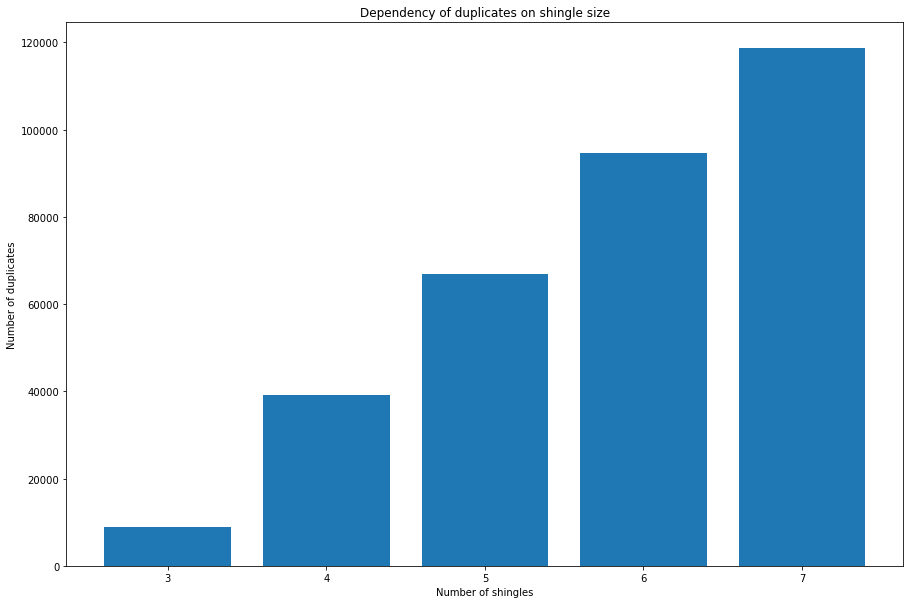

In [351]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.bar(shingles, results, align='center')
plt.title('Dependency of duplicates on shingle size')
plt.xlabel('Number of shingles')
plt.ylabel('Number of duplicates')
plt.xticks(shingles, shingles)
plt.show()

In [353]:
results_2 = []
num_perm = [50, 90, 130, 170, 210]
for minmush in num_perm:
    num = lsh_m(lsh_data, 5, minmush)[2]
    results_2.append(num)

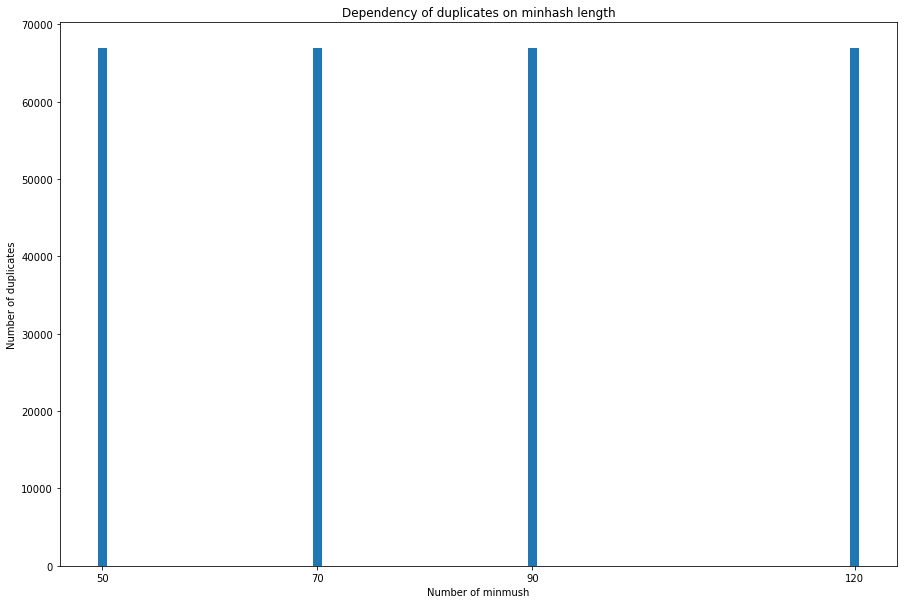

In [354]:
plt.figure(figsize=(15, 10))
plt.bar(num_perm, results_2, align='center')
plt.title('Dependency of duplicates on minhash length')
plt.xlabel('Number of minmush')
plt.ylabel('Number of duplicates')
plt.xticks(num_perm, num_perm)
plt.show()

# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

Plot the histogram of resulting tokens counts in the processed datasets.

Plot the histogram of resulting tokens counts in the processed datasets.

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

Write a function to convert new documents to topics probabilities vectors.

Calculate the quality scores for each model. Make a barplot to compare the quality.